In [1]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import configs
import seaborn as sns

# Basic comparisons with MF

### Parameters

In [2]:
internal_dim = 12
generic_exp_name = 'new_gridworld8x8_shuffobs'
network_yaml = 'dm'
episode = 600
hue_order = ['mf0', 'entro0', 'g0_-2_entro-1']

In [3]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [4]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]

/home/cf2794/.conda/envs/auxrl/lib/python3.8/site-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/home/cf2794/.conda/envs/auxrl/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


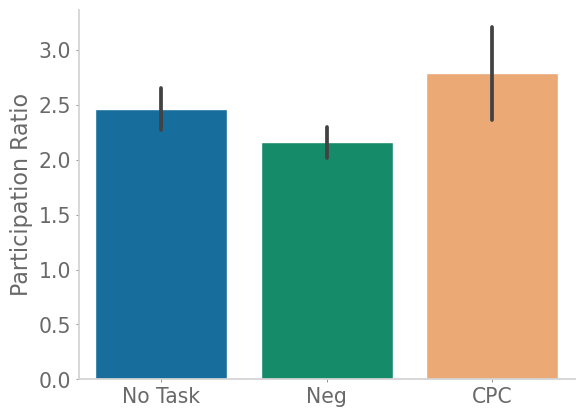

In [5]:
plt.figure()
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
sns.barplot(
    x='model', y='participation_ratio',
    order=hue_order, data=dim_df,
    palette=['C0', 'C2', colors(c_steps[0])])
plt.xticks([0,1,2], ['No Task', 'Neg', 'CPC'])
plt.xlabel(None)
#plt.axhline(2.5, color='gray', linestyle='--')
#plt.ylim(0, 2.75)
plt.ylabel('Participation Ratio')
plt.show()

# Comparing $\gamma$ timescales

### Parameters

In [10]:
internal_dim = 20
generic_exp_name = 'new_gridworld8x8_shuffobs'
network_yaml = 'dm_large_q'
episode = 600
hue_order = ['g0_-2_entro-1', 'g0.25_-2_entro0',
    'g0.5_-2_entro0', 'g0.8_-4_entro0']

In [7]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and plot

In [8]:
with open(f'{analysis_dir}representation_df_ep{episode}.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}dimensionality_df_ep{episode}.p', 'rb') as f:
    dim_df = pickle.load(f)
with open(f'{analysis_dir}transition_df_ep{episode}.p', 'rb') as f:
    transition_df = pickle.load(f)
dim_df.model = dim_df.model.str[len(generic_exp_name)+1:]
print(np.unique(repr_df.model))

['new_gridworld8x8_shuffobs_entro2'
 'new_gridworld8x8_shuffobs_g0.25_-2_entro0'
 'new_gridworld8x8_shuffobs_g0.5_-2_entro0'
 'new_gridworld8x8_shuffobs_g0.8_-4_entro0'
 'new_gridworld8x8_shuffobs_g0_-2_entro-1' 'new_gridworld8x8_shuffobs_mf0']


/home/cf2794/.conda/envs/auxrl/lib/python3.8/site-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/home/cf2794/.conda/envs/auxrl/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


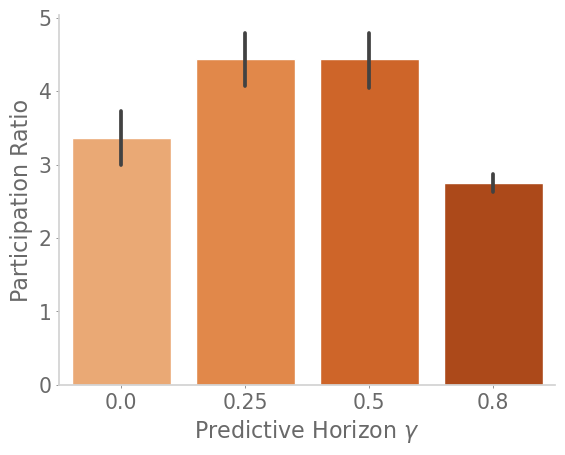

In [11]:
plt.figure()
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
sns.barplot(
    x='model', y='participation_ratio', order=hue_order, data=dim_df,
    palette=[colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3]),
          colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])])
plt.xticks([0], ['No Task'])
plt.xlabel('Predictive Horizon $\gamma$')
plt.xticks([0,1,2,3], [0.0, 0.25, 0.5, 0.8])
#plt.axhline(2.5, color='gray', linestyle='--')
#plt.ylim(0, 2.75)
plt.ylabel('Participation Ratio')
plt.show()